<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Automation/blob/main/Gardner's_Multiple_Intelligence_Theory_Questionnaire_%26_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pygal
! pip install gspread
! pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 742.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 2.9 MB/s eta 0:00:00


# Get the data and make a graph

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('MI_Qs').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
#print(rows)

In [3]:
import pandas as pd
header = rows[0]
df = pd.DataFrame.from_records(rows[1:], columns=header)

df.iloc[:, 2:-2] = df.iloc[:, 2:-2].apply(pd.to_numeric, errors='coerce').astype('Int64')

df = df.drop_duplicates(subset = ["Email Address"], keep='last')


In [4]:
import pandas as pd

temp = pd.DataFrame()
colnames = ["Verbal", "Logical", "Visual", "Interpersonal", "Musical", "Naturalistic", "Body", "Intrapersonal"
                                  ]
temp["email"] = df["Email Address"]
temp["name"] = df.iloc[:, -2]
temp["gender"]=df.iloc[:, -1]


# Repeat the process 3 times
for i in range(8):
    # Calculate the sum for each category based on 8 columns starting from column index 2
    start_col = 2 + i * 8
    end_col = start_col+1 + 7
    #print(start_col, end_col)
    col_name = colnames[i]
    #print(col_name)
    temp[col_name] = df.iloc[:, start_col:end_col].sum(axis=1)


temp.head(1)

,email,name,gender,Verbal,Logical,Visual,Interpersonal,Musical,Naturalistic,Body,Intrapersonal
0,mariayskusa@gmail.com,Joy,Female,39.0,37.0,40.0,26.0,39.0,32.0,38.0,26.0


In [5]:
temp_prop = temp

temp_prop.iloc[:, 3:] = temp_prop.iloc[:, 3:] / 40

temp_prop.head(1)

,email,name,gender,Verbal,Logical,Visual,Interpersonal,Musical,Naturalistic,Body,Intrapersonal
0,mariayskusa@gmail.com,Joy,Female,0.975,0.925,1.0,0.65,0.975,0.8,0.95,0.65


In [6]:
temp_prop.iloc[:, 3:].mean()

Verbal           0.666667
Logical          0.611111
Visual           0.616667
Interpersonal    0.580556
Musical          0.705556
Naturalistic     0.613889
Body             0.700000
Intrapersonal    0.675000
dtype: float64

In [11]:
by_gender = temp_prop.groupby("gender").mean().reset_index()
by_gender

<ipython-input-11-c50f66bf33a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_gender = temp_prop.groupby("gender").mean().reset_index()


,gender,Verbal,Logical,Visual,Interpersonal,Musical,Naturalistic,Body,Intrapersonal
0,,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
1,Female,0.735714,0.653571,0.646429,0.621429,0.796429,0.678571,0.753571,0.742857
2,Male,0.650000,0.725000,0.825000,0.675000,0.575000,0.575000,0.825000,0.675000


<ipython-input-13-914c141075df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_gender = temp_prop.groupby("gender").mean().reset_index()


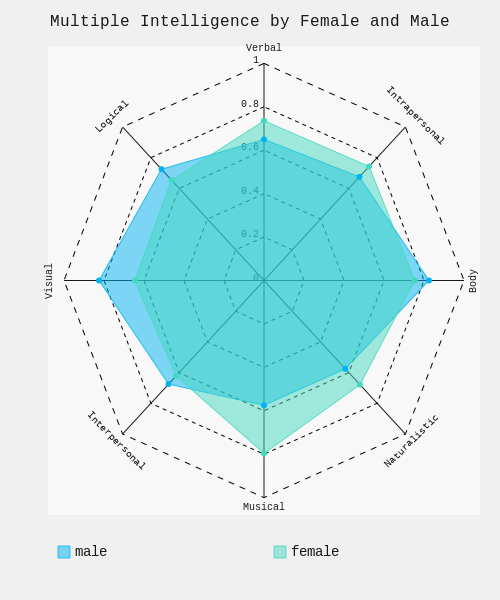

In [13]:
by_gender = temp_prop.groupby("gender").mean().reset_index()
# print(by_gender)

import pygal
from pygal.style import BlueStyle


radar_chart = pygal.Radar(fill=True,width=500, height=600, title_font_size=10, style=BlueStyle)
radar_chart.title = "Multiple Intelligence by Female and Male"

radar_chart.x_labels = by_gender.columns.tolist()[1:]

radar_chart.range = (0, 1)
radar_chart.add("male", by_gender.iloc[2, 1:] )
radar_chart.add("female", by_gender.iloc[1, 1:])

radar_chart.legend_at_bottom = True
radar_chart.legend_font_size = 10

radar_chart.label_font_size = 14
radar_chart.label_font_weight = 'bold'

radar_chart

radar_chart.render_to_png('ByGenderMI.png')

radar_chart

In [14]:
# Graph

import pygal
import cairosvg
from pygal.style import LightColorizedStyle, CleanStyle, RedBlueStyle, DarkColorizedStyle, LightColorizedStyle, TurquoiseStyle, BlueStyle


labels = temp_prop.columns[3:].tolist()

for i in range(len(temp_prop)):
  radar_chart = pygal.Radar(fill=True,width=500, height=600, title_font_size=10, style=BlueStyle)

  radar_chart.title = f'Multiple Intelligence Quiz for {temp_prop.iloc[i,1]}'

  radar_chart.x_labels = labels
  radar_chart.range = (0, 1)
  radar_chart.add("total average", temp_prop.iloc[:, 3:].mean().tolist())
  radar_chart.add(temp_prop.iloc[i, 1], temp_prop.iloc[i, 3:].tolist())


  radar_chart.legend_at_bottom = True
  radar_chart.legend_font_size = 10

  radar_chart.label_font_size = 14  # Adjust the font size
  radar_chart.label_font_weight = 'bold'

  name = temp_prop.iloc[i, 0]

  radar_chart.render_to_png(f'{name}.png')  # Save to an SVG file

# Send Emails

In [ ]:
receivers = temp["email"].unique().tolist()
[receivers[-1]]

['neona89024575109@gmail.com']

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

# List of recipients
receivers = temp["email"].unique().tolist()
receivers = receivers[-2:]
#print(receivers)

# Common email content
common_content = """
The graph for your MI Quiz

by Joy Younsoo Kim
"""

# SMTP server and credentials
smtp_server = "smtp.naver.com"
smtp_port = 587
email_id = ""
email_pw = ""

for recipient in receivers:
    print(recipient)
    # Create a new message for each recipient
    message = MIMEMultipart()
    message['Subject'] = 'NLPL_EnlgishClass_MI_Quiz_Graph'
    message['From'] = "mariaysk@naver.com"
    message['To'] = recipient

    content = common_content.format(title='MI_Quiz_Graph_Sat_Class')

    mimetext = MIMEText(content, 'plain')
    message.attach(mimetext)

    # Construct the image file path based on the recipient's email address
    image_file_path = f"{recipient}.png"  # Adjust the path and filename as needed
    #print(image_file_path)

    # Attach the image file
    with open(image_file_path, "rb") as file:
        img = MIMEImage(file.read())
        img.add_header("Content-Disposition", "attachment", filename="image.png")
        message.attach(img)

    # Connect to the SMTP server and send the email
    server = smtplib.SMTP(smtp_server, smtp_port)
    server.ehlo()
    server.starttls()
    server.login(email_id, email_pw)
    server.sendmail(message['From'], recipient, message.as_string())
    server.quit()

    print(f"Email sent to {recipient} with attachment: {image_file_path}")


['mafeamaya05@gmail.com', 'muchammad.mardhi@gmail.com']
mafeamaya05@gmail.com
mafeamaya05@gmail.com.png
Email sent to mafeamaya05@gmail.com with attachment: mafeamaya05@gmail.com.png
muchammad.mardhi@gmail.com
muchammad.mardhi@gmail.com.png
Email sent to muchammad.mardhi@gmail.com with attachment: muchammad.mardhi@gmail.com.png


# PyGal Example


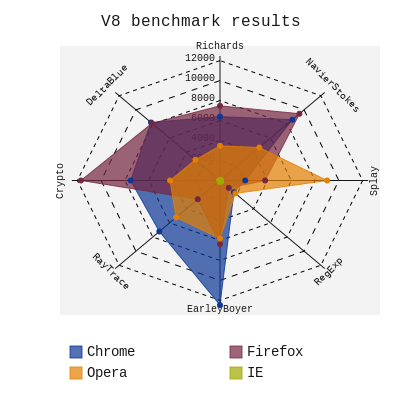

In [ ]:
# PyGal Radar Chart Example

from pygal.style import DarkSolarizedStyle, LightSolarizedStyle, CleanStyle

radar_chart = pygal.Radar(fill=True, width=400, height=400, title_font_size=10)
radar_chart.title = 'V8 benchmark results'
radar_chart.x_labels = ['Richards', 'DeltaBlue', 'Crypto', 'RayTrace', 'EarleyBoyer', 'RegExp', 'Splay', 'NavierStokes']
radar_chart.add('Chrome', [6395, 8212, 7520, 7218, 12464, 1660, 2123, 8607])
radar_chart.add('Firefox', [7473, 8099, 11700, 2651, 6361, 1044, 3797, 9450])
radar_chart.add('Opera', [3472, 2933, 4203, 5229, 5810, 1828, 9013, 4669])
radar_chart.add('IE', [43, 41, 59, 79, 144, 136, 34, 102])

radar_chart.legend_at_bottom = True
radar_chart.legend_font_size = 10

radar_chart

#radar_chart.render()